# Visualize gene expression

This notebook visualizes the trends in gene expression data for the template and simulated experiments

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

In [2]:
import os
import pandas as pd

from ponyo import utils
from generic_expression_patterns_modules import plot

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load config parameters

In [3]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_pseudomonas_17179.tsv")
)

params = utils.read_config(config_filename)

In [4]:
# Load config params
local_dir = params['local_dir']
dataset_name = params['dataset_name']
project_id = params['project_id']
num_simulated = params['num_simulated']

pval_name = "adj.P.Val"
logFC_name = "logFC"

gene_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_gene_summary_{project_id}.tsv"
)

## Volcano plots

In [5]:
# Check number of DEGs
template_DE_stats_filename = os.path.join(
    local_dir,
    "DE_stats",
    f"DE_stats_template_data_{project_id}_real.txt"
)

template_DE_stats = pd.read_csv(
    template_DE_stats_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

selected = template_DE_stats[(template_DE_stats[pval_name]<0.01) & (abs(template_DE_stats[logFC_name])>1)]
print(selected.shape)

(35, 6)


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


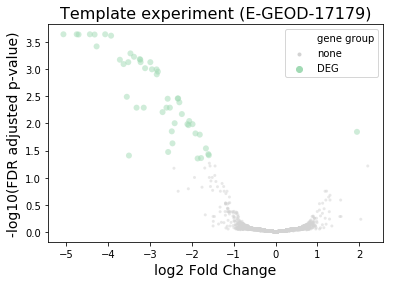

In [6]:
plot.make_volcano_template_highlight_DEG(
    template_DE_stats_filename,
    project_id,
    pval_name,
    logFC_name,
    os.path.join(local_dir,f"template_volcano_DEG_{project_id}.svg")
)

50


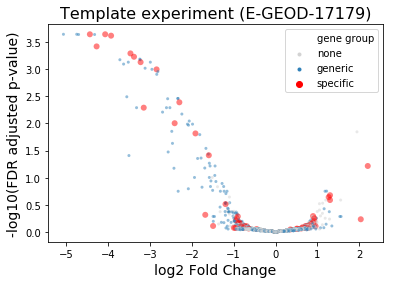

In [7]:
plot.make_volcano_template_highlight_generic_specific(
    gene_summary_filename,
    4500,
    50,
    template_DE_stats_filename,
    project_id,
    pval_name,
    logFC_name,
    os.path.join(local_dir,f"template_volcano_generic_specific_{project_id}.svg")
)

50


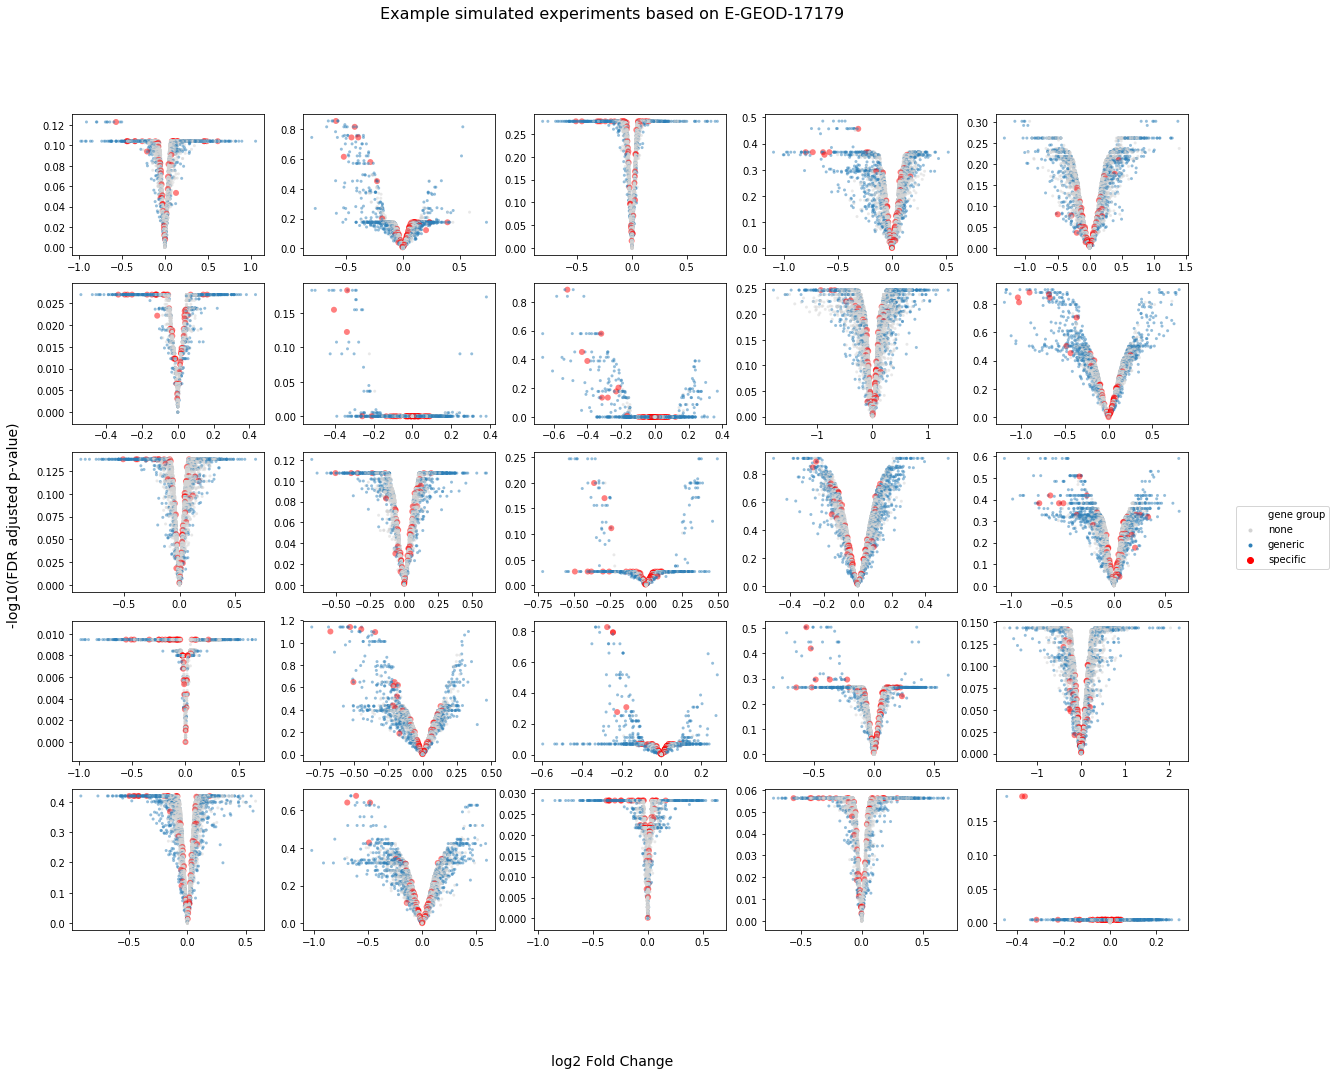

In [8]:
simulated_DE_stats_dir = os.path.join(local_dir, "DE_stats")

plot.make_volcano_simulated_highlight_generic_specific(
    gene_summary_filename,
    4500,
    50,
    simulated_DE_stats_dir,
    project_id,
    pval_name,
    logFC_name,
    num_simulated,
    5,
    5,
    20,
    15,
    os.path.join(local_dir,f"simulated_volcano_generic_specific_{project_id}.svg")
)

**Takeaway:**

In the template experiment, the generic (blue) and specific (red) genes are both found to be highly DE (i.e. the genes tend to be towards the tails of the plot). However in the simulated experiments, the generic genes (blue) are found to be highly DE across all simulated experiments whereas the specific genes (red) are found to be highly DE sometimes depending on the experiment.

These plots demonstrate that generic genes are consistently DE across multiple simulated experiments while specific genes depend on the context of the experiment.